In [13]:
# pip install ipympl
%matplotlib widget
# Import packages
import numpy as np
from mpl_toolkits.mplot3d import Axes3D   # Needed to create 3D plots
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math   
from matplotlib.widgets import Button, Slider

In [14]:
curve_y_length = 5
curve_y_dir_min = -curve_y_length
curve_y_dir_max = curve_y_length

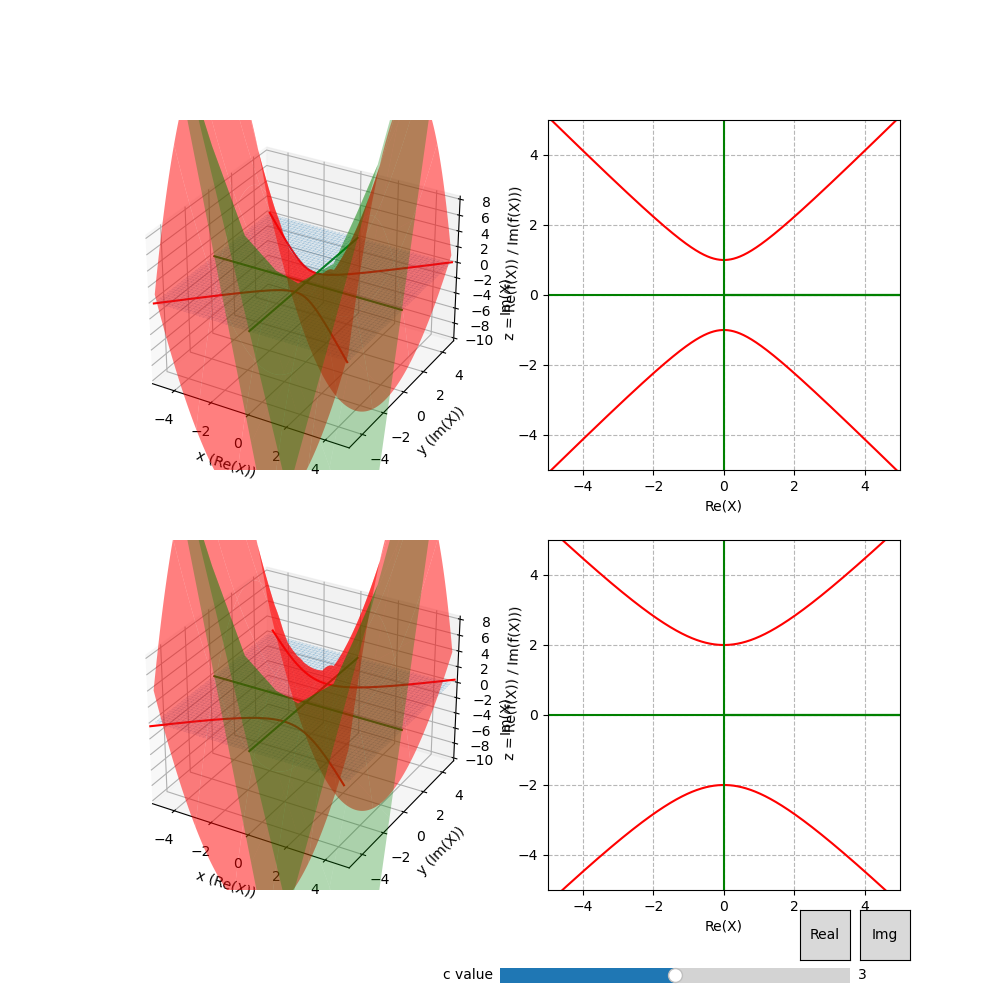

In [15]:
# Define function
def fun(x, c = 1):
    # Note: x is a complex() object, and * and + are defined for complex numbers
    return x*x + c

def surface_1_curve(x, c = 1):
    return np.sqrt(x*x + c)

def surface_2_curve(x, c = 1):
    return -1.0 * np.sqrt(x*x + c)

# Create 1x1 figure with 3 axes
fig = plt.figure(figsize=(10,10))
ax_0 = fig.add_subplot(221, projection='3d')
ax_1 = fig.add_subplot(222)
ax_2 = fig.add_subplot(223, projection='3d')
ax_3 = fig.add_subplot(224)
# Define grid of x and w using a step of 0.05
x = np.arange(-5.0, 5.0, 0.01)
y = np.arange(curve_y_dir_min, curve_y_dir_max, 0.01)
X, Y = np.meshgrid(x,y)
complexVals = X + 1j*Y      # Convert X/Y grid into complex numbers


def draw_3d_and_interc(c, ax_0, ax_1):

    # Call the function on the complex numbers and extract the real/imag parts
    Z = fun(complexVals, c)
    Z_re = Z.real
    Z_img = Z.imag
    # Create surface real
    surface_real= ax_0.plot_surface(X, Y, Z_re, shade=False,
                    linewidth=0, antialiased=True, alpha = 0.5, rstride=200, cstride=200, color = 'r')

    # draw the intersection curve between real surface with X-Y plane
    line_real = ax_0.plot(x, surface_1_curve(x, c), np.zeros_like(x), color = 'r')
    line_real_1 = ax_0.plot(x, surface_2_curve(x, c), np.zeros_like(x), color = 'r')

    # draw the intersection curve between imaginary surface with X-Y plane
    line_img = ax_0.plot(x, np.zeros_like(x), np.zeros_like(x), color='g')
    line_img_1 = ax_0.plot(np.zeros_like(x), x, np.zeros_like(x), color='g')

    # Create surface img
    surface_img= ax_0.plot_surface(X, Y, Z_img, shade=False, linewidth=0, antialiased=True, alpha = 0.3,rstride=200, cstride=200, color='g')

    # draw X-Y plane
    ax_0.plot_surface(X, Y, np.zeros_like(X), shade=False,
                    linewidth=0, antialiased=False, alpha = 0.1)

    # draw the intersection curve between real surface with X-Y plane on subplot
    line_real_ax1 = ax_1.plot(x, surface_1_curve(x, c), color = 'r')
    line_real_1_ax1 = ax_1.plot(x, surface_2_curve(x, c), color = 'r')
    line_img_ax1 = ax_1.plot(x, np.zeros_like(x), np.zeros_like(x), color='g')
    line_img_1_ax1 = ax_1.plot(np.zeros_like(x), x, np.zeros_like(x), color='g')

    ax_0.set_xlabel('x (Re(X))')
    ax_0.set_ylabel('y (Im(X))')
    ax_0.set_zlabel('z = Re(f(X)) / Im(f(X)))')
    ax_0.set_xlim(-5, 5)
    ax_0.set_ylim(-5, 5)
    ax_0.set_zlim(-5, 5)
    ax_0.set_proj_type('persp')
    ax_0.set_zticks(np.arange(-10,10,2)) 
    ax_1.set_xlim(-5, 5)
    ax_1.set_ylim(-5, 5)
    ax_1.set_xlabel('Re(X)')
    ax_1.set_ylabel('Im(X)')
    ax_1.grid(alpha=.9, which='both', linestyle='--')

    return surface_real, line_real, line_real_1, line_img, line_img_1, surface_img, line_real_ax1, line_real_1_ax1, line_img_ax1, line_img_1_ax1

surface_real, line_real, line_real_1, line_img, line_img_1, surface_img, line_real_ax1, line_real_1_ax1, line_img_ax1, line_img_1_ax1 = draw_3d_and_interc(c=1, ax_0=ax_0, ax_1=ax_1)
surface_real_user, line_real_user, line_real_1_user, line_img_user, line_img_1_user, surface_img_user, line_real_ax1_user, line_real_1_ax1_user, line_img_ax1_user, line_img_1_ax1_user = draw_3d_and_interc(c=4, ax_0=ax_2, ax_1=ax_3)

class ViewController:
    azim = -60
    elev = 30

    def set_view_1(self, event):
        self.azim = 0
        self.elev = 30
        ax_0.azim = self.azim
        ax_0.elev = self.elev
        ax_0.dist = 3
        plt.draw()
        # self.show_status()

    def set_view_2(self, event):
        self.azim = 90
        self.elev = 45
        ax_0.azim = self.azim
        ax_0.elev = self.elev
        ax_0.dist = 3
        plt.draw()
        # self.show_status()
    
    def toggleVisSurfaceReal(self, event):
        for obj in [surface_real, line_real[0], line_real_1[0], line_real_ax1[0], line_real_1_ax1[0], surface_real_user, line_real_user[0], line_real_1_user[0], line_real_ax1_user[0], line_real_1_ax1_user[0]]:
            if obj.get_visible():
                obj.set_visible(False)
            else:
                obj.set_visible(True)
        plt.draw()

    
    def toggleVisSurfaceImg(self, event):
        for obj in [surface_img, line_img[0], line_img_1[0], line_img_ax1[0], line_img_1_ax1[0], surface_img_user, line_img_user[0], line_img_1_user[0], line_img_ax1_user[0], line_img_1_ax1_user[0]]:
            if obj.get_visible():
                obj.set_visible(False)
            else:
                obj.set_visible(True)
        plt.draw()

    
    def show_status(self):
        print('ax.azim = {}'.format(ax_0.azim))
        print('ax.dist = {}'.format(ax_0.dist))
        print('ax.elev = {}'.format(ax_0.elev))

callback = ViewController()
# btn_ax = fig.add_axes([0.7, 0.05, 0.1, 0.075])
# btn = Button(btn_ax, "View 1")
# btn.on_clicked(callback.set_view_1)

# btn_ax_2 = fig.add_axes([0.81, 0.05, 0.1, 0.075])
# btn_2 = Button(btn_ax_2, "View 2")
# btn_2.on_clicked(callback.set_view_2)

btn_ax_3 = fig.add_axes([0.8, 0.04, 0.05, 0.05])
btn_3 = Button(btn_ax_3, "Real")
btn_3.on_clicked(callback.toggleVisSurfaceReal)

btn_ax_4 = fig.add_axes([0.86, 0.04, 0.05, 0.05])
btn_4 = Button(btn_ax_4, "Img")
btn_4.on_clicked(callback.toggleVisSurfaceImg)

def slider_update(val):
    ax_2.clear()
    ax_3.clear()
    global surface_real_user, line_real_user, line_real_1_user, line_img_user, line_img_1_user, surface_img_user, line_real_ax1_user, line_real_1_ax1_user, line_img_ax1_user, line_img_1_ax1_user
    surface_real_user, line_real_user, line_real_1_user, line_img_user, line_img_1_user, surface_img_user, line_real_ax1_user, line_real_1_ax1_user, line_img_ax1_user, line_img_1_ax1_user = draw_3d_and_interc(c=val, ax_0=ax_2, ax_1=ax_3)
    # sync visibility
    if surface_real.get_visible():
        for obj in [surface_real_user, line_real_user[0], line_real_1_user[0], line_real_ax1_user[0], line_real_1_ax1_user[0]]:
            obj.set_visible(True)
    else:
        for obj in [surface_real_user, line_real_user[0], line_real_1_user[0], line_real_ax1_user[0], line_real_1_ax1_user[0]]:
            obj.set_visible(False)
    if surface_img.get_visible():
        for obj in [surface_img_user, line_img_user[0], line_img_1_user[0], line_img_ax1_user[0], line_img_1_ax1_user[0]]:
            obj.set_visible(True)
    else:
        for obj in [surface_img_user, line_img_user[0], line_img_1_user[0], line_img_ax1_user[0], line_img_1_ax1_user[0]]:
            obj.set_visible(False)  
    plt.draw()

# a slider
slider_ax1 = fig.add_axes([0.5, 0.01, 0.35, 0.03])
freq_slider = Slider(
    ax=slider_ax1,
    label='c value',
    valmin=1,
    valmax=5,
    valinit=3,
    valstep=1
)
freq_slider.on_changed(slider_update)

# Show plot 
plt.show()